In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
import plotly.graph_objects as go

from google.colab import files
from skimage.metrics import mean_squared_error

# Upload medical images and assign file names as keys
uploaded = files.upload()
uploaded_keys = list(uploaded.keys())
print(uploaded_keys)

Text(0.5, 1.0, 'CT Image')

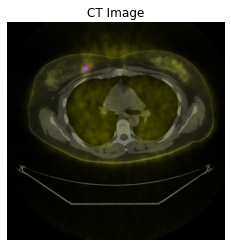

In [34]:
# Original image
image = cv.imread('/content/'+ uploaded_keys[9])
plt.imshow(image)
plt.axis('off')
plt.title('CT Image')

**Rotation**

*a) Rotation 90°*

In [ ]:
uploaded = files.upload()
keys = list(uploaded.keys())
print(keys)

In [37]:
def rotationMatrix(angle,cx,cy):
  T_rotate = np.array([
    [round(np.cos(angle)), round(-np.sin(angle)), 0],
    [round(np.sin(angle)), round(np.cos(angle)), 0],
    [0, 0, 1]])

  T_translation = np.array([
    [1, 0, cx],
    [0, 1, cy],
    [0, 0, 1]])
  return T_rotate @ T_translation

def rotationFunction(image,rotation_image):
  for i, row in enumerate(image):
    for j, col in enumerate(row):
      pixel_data = image[i, j, :]
      input_coords = np.array([i, j, 1])
      i_out, j_out, _ = T_rotation @ input_coords
      rotation_image[i_out, j_out, :] = pixel_data
  return rotation_image


In [56]:
T_rotation = rotationMatrix(np.pi/2,0,1)

rotation_mse = []

for k in range(0,len(uploaded_keys)):
  image = cv.imread('/content/' + uploaded_keys[k])
  rotation_viewer = cv.imread('/content/' + keys[k])
  rotation_image = rotationFunction(image,np.empty(image.shape, dtype=np.uint8))
  rotation_mse.append(mean_squared_error(rotation_image, rotation_viewer))
print(rotation_mse)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Viewer')

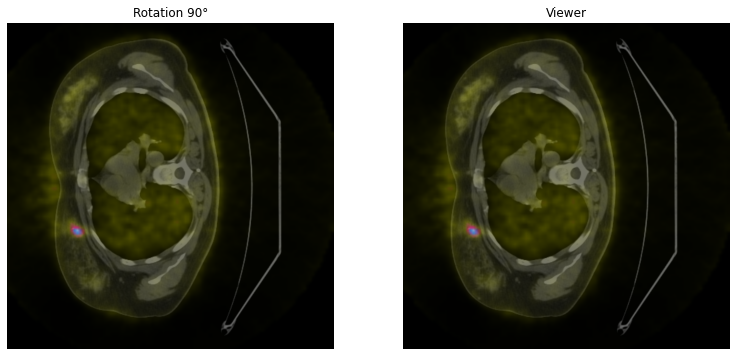

In [57]:
fig, axs = plt.subplots(1, 2,sharex=True, figsize=(13,6))
axs[0].imshow(rotation_image)
axs[0].axis('off')
axs[0].set_title('Rotation 90°')
axs[1].imshow(rotation_viewer)
axs[1].axis('off')
axs[1].set_title('Viewer')

*b) Rotation 180°*

In [ ]:
uploaded = files.upload()
keys = list(uploaded.keys())
print(keys)

In [59]:
T_rotation = rotationMatrix(np.pi,1,1)

rotation180_mse = []

for k in range(0,len(uploaded_keys)):
  image = cv.imread('/content/' + uploaded_keys[k])
  rotation_viewer = cv.imread('/content/' + keys[k])
  rotation_image = rotationFunction(image,np.empty(image.shape, dtype=np.uint8))
  rotation180_mse.append(mean_squared_error(rotation_image, rotation_viewer))
print(rotation180_mse)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Viewer')

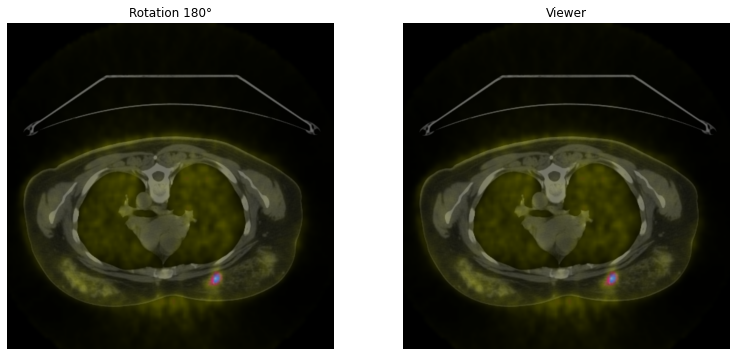

In [60]:
fig, axs = plt.subplots(1, 2,sharex=True, figsize=(13,6))
axs[0].imshow(rotation_image)
axs[0].axis('off')
axs[0].set_title('Rotation 180°')
axs[1].imshow(rotation_viewer)
axs[1].axis('off')
axs[1].set_title('Viewer')

*c) Rotation 270°*

In [ ]:
uploaded = files.upload()
keys = list(uploaded.keys())
print(keys)

In [62]:
T_rotation = rotationMatrix((3*np.pi/2),1,0)

rotation270_mse = []

for k in range(0,len(uploaded_keys)):
  image = cv.imread('/content/' + uploaded_keys[k])
  rotation_viewer = cv.imread('/content/' + keys[k])
  rotation_image = rotationFunction(image,np.empty(image.shape, dtype=np.uint8))
  rotation270_mse.append(mean_squared_error(rotation_image, rotation_viewer))
print(rotation270_mse)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Viewer')

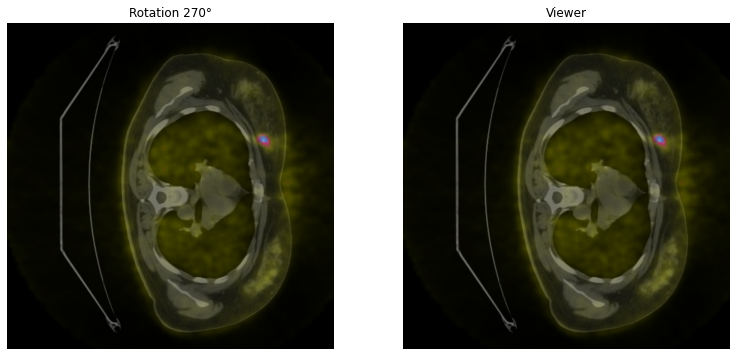

In [63]:
fig, axs = plt.subplots(1, 2,sharex=True, figsize=(13,6))
axs[0].imshow(rotation_image)
axs[0].axis('off')
axs[0].set_title('Rotation 270°')
axs[1].imshow(rotation_viewer)
axs[1].axis('off')
axs[1].set_title('Viewer')

**MSE VALUES**

In [64]:
fig = go.Figure(data=[go.Table(header=dict(values=['Image', 'MSE Rotation 90°', 'MSE Rotation 180°','MSE Rotation 270°']),
                 cells=dict(values=[uploaded_keys, rotation_mse,rotation180_mse,rotation270_mse]))
                     ])
fig.update_layout(width=800, height=500)
fig.show()

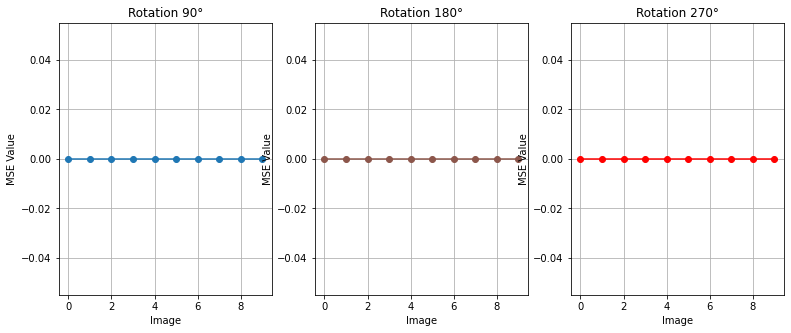

In [65]:
fig, axs = plt.subplots(1, 3,sharex=True, figsize=(13,5))
axs[0].plot(rotation_mse,marker='o',color='#1f77b4')
axs[0].set_title('Rotation 90°')
axs[0].set_xlabel('Image')
axs[0].set_ylabel('MSE Value')
axs[0].grid(True)
axs[1].plot(rotation180_mse,marker='o',color='#8c564b')
axs[1].set_title('Rotation 180°')
axs[1].set_xlabel('Image')
axs[1].set_ylabel('MSE Value')
axs[1].grid(True)
axs[2].plot(rotation270_mse,marker='o',color='red')
axs[2].set_title('Rotation 270°')
axs[2].set_xlabel('Image')
axs[2].set_ylabel('MSE Value')
axs[2].grid(True)